# Анализ компьютерных игр в интернет-магазине

Цель проекта - сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, для этого нужно выявить определяющие успешность игры закономерности. Будем работать с историческими данными о компьютерных играх в интернет-магазине. В датасете имеется информация о жанре игры, платформе, на которой она выпущена, о продажах игр в разных регионах, а также год выпуска и оценки пользователей и критиков. Представлены данные с 1980 год по 2016 год.
Анализ будем проводить в следующем порядке: 
1. Изучим общую информацию о датасете.
2. Подготовим и обработаем данные.
3. Проведем исследовательский анализ данных.
4. Составим портрет пользователя каждого региона. 
6. Сделаем общий вывод.

## 1. Общая информация о данных

In [1]:
import pandas as pd 

try: 
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter('ignore')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.duplicated().sum()
# проверяем, есть ли дубликаты

0

В таблице 16715 строк, 11 столбцов. В датасете представлены исторические данные из интернет-магазина о продажах игр, оценки пользователей и экспертов, жанры и платформы. В 6 столбцах есть пропущенные значения. Нужно будет обработать пропущенные значения, изменить тип некоторых данных и найти закономерности.

## 2. Предобработка данных

### 2.1. Изменение наименований столбцов

In [6]:
data.columns = data.columns.str.lower() 
# приведем названия столбцов к нижнему регистру 

### 2.2. Изменение типа данных

In [7]:
data[['year_of_release', 'na_sales', 'eu_sales', 
      'jp_sales', 'other_sales', 'critic_score']] = data[['year_of_release', 
                                                          'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
                                                          'critic_score']].astype('float32') 
# поменяем тип данных в некоторых столбцах на float32 для экономии памяти

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [9]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float32
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float32(6), float64(1), object(4)
memory usage: 1.0+ MB


Могли бы поменять тип данных в столбце year_of_release в int, но мешают пропуски в значениях, сейчас данные в столбце с годом выпуска имеют тип данных - float32.
Также могли бы тип данных в столбце critic_score заменить на int, так как там представлены только целые значения, но пропуски не позволяют.

### 2.3. Обработка пропущенных значений

In [11]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце name есть два пропуска, в этих строках также есть пропуски в 4 других столбцах, в том числе в столбце genre, удалим эти строки.

In [12]:
data = data.dropna(subset=['name'])

In [13]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце year_of_release 269 пропусков (~1.6%), пропуски в этом столбце могли быть по разным причинам, например игра могла быть выпущена в один год, потом снята с продаж из-за большого количества багов, а потом снова выставлена на продажу, в этом случае год выпуска могли не указать, или игры могли выходить в сборнике, и год выпуска мог быть указан по ошибке только для одной из игр. Информация о годе выпуске игры ключевая. Пропуски заменить не можем, удалим эти строки.  

In [14]:
data = data.dropna(subset=['year_of_release'])

In [15]:
data['year_of_release'] = data['year_of_release'].astype(int)
# теперь можем заменить тип данных в столбце year_of_release

In [16]:
data[data['critic_score'].isna()] 
# всего 8576 строк с пропусками в столбце critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000000,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010000,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
data[data['critic_score'].isna() & data['user_score'].isna()]
# всего 6661 строк с пропусками и в столбце critic_score, и в столбце user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000000,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010000,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
data[data['critic_score'].isna() & data['user_score'].isna() & data['rating'].isna()]
# всего 6619 строк, там где есть пропуски одновременно в столбцах: critic_score, user_score, rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000000,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010000,0.00,0.00,0.00,NaN,NaN,NaN


Предположим, что пропуски в столбцах user_score, critic_score, rating присутствуют в связи со следующими причинами: 
1) игра вышла давно, в тот период, когда критика видеоигр еще не была развита, соотвественно данных по старым играм нет, 
2) данные о критике пользователей старых игр не собирались, соответственно также нет данных,
3) игра вышла недавно, и данные по критике пока не собраны,
4) игра совсем непопулярна, и по ней не хватает данных, чтобы собрать данные по критике, 
5) пропуски в столбце rating могли быть, так как игра непопулярна, и организация либо пока не присвоила категорию, либо уже никогда не присвоит,
6) могли быть ошибки при вводе, а также возможны другие причины.
Пропусков в этих столбцах довольно много, ни удалить, ни заменить на какое-то логическое значение не можем, оставим как есть.

In [19]:
data['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

В столбце user_score 2424 раза встречается tbd, это означает, что рейтинг еще не определен, заменим эти значения на NaN.

In [20]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [21]:
data['user_score'] = data['user_score'].astype('float32') 
# теперь можем поменять тип данных в столбце на float32

In [22]:
data['sales_total'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
 11  sales_total      16444 non-null  float32
dtypes: float32(7), int32(1), object(4)
memory usage: 1.1+ MB


После предобработки данных в датасете стало на 271 строк меньше (~1.6%) - допустимое значение.

### 3. Исследовательский анализ данных

### 3.1. Выпуск игр в разные годы

In [24]:
data['year_of_release'].value_counts().sort_values()

1980       9
1984      14
1985      14
1988      15
1987      16
1990      16
1983      17
1989      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: year_of_release, dtype: int64

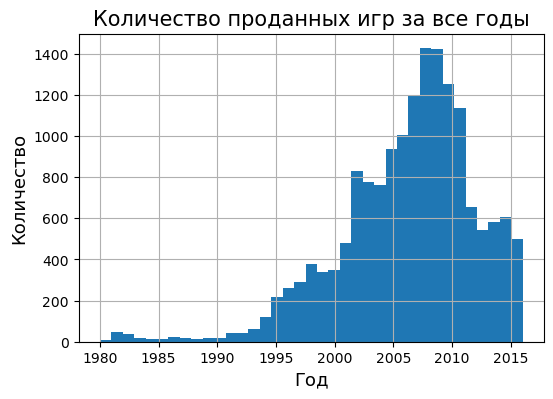

In [25]:
data['year_of_release'].plot(kind='hist', bins=37, figsize=(6,4))
plt.title('Количество проданных игр за все годы', fontsize=15)
plt.xlabel('Год', fontsize=13)
plt.ylabel('Количество', fontsize=13)
plt.grid(True)
# построим гистрограмму, чтобы посмотреть на количество проданных игры за все годы

В 2008 году вышло самое большое количество игр, в 1980 году - всего 8 (1980 - первый год выпуска, 2016 год - последний). Чаще всего игры выходили с 2006 года по 2011 год. На графике видим, что до 1995 года было выпущено значительно меньше игр.

In [26]:
data.query('year_of_release < 1995')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,NaN,NaN,NaN,40.240002
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,NaN,NaN,NaN,30.260000
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,NaN,NaN,NaN,28.309999
18,Super Mario World,SNES,1990,Platform,12.780000,3.75,3.54,0.55,NaN,NaN,NaN,20.619999
21,Super Mario Land,GB,1989,Platform,10.830000,2.71,4.18,0.42,NaN,NaN,NaN,18.139999
...,...,...,...,...,...,...,...,...,...,...,...,...
15551,Mortal Kombat,PC,1994,Fighting,0.020000,0.00,0.00,0.00,NaN,NaN,NaN,0.020000
15692,Empire Deluxe,PC,1992,Strategy,0.020000,0.00,0.00,0.00,NaN,NaN,NaN,0.020000
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.000000,0.00,0.02,0.00,NaN,NaN,NaN,0.020000
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.000000,0.00,0.02,0.00,NaN,NaN,NaN,0.020000


Всего 486 игр было выпущено до 1995 года, это около 3 процентов от общего количества. Можно сказать, что данные об играх за эти периоды не столь важны для анализа, и не так актуальны для анализа нынешнего рынка игр, основной пул игр вышел значительно позже. Если мы хотим сделать прогноз на 2017 год, то нужно будет использовать наиболее актуальный период времени, который наиболее точно описывает нынешнюю обстановку на рынке компьютерных игр.

### 3.2. Динамика продаж по платформам

In [27]:
len(data['platform'].unique()) # посчитаем количество платформ

31

In [28]:
data.groupby('platform')['sales_total'].sum().sort_values(ascending=False)
# отсортируем продажи на каждой платформе

platform
PS2     1233.559937
X360     961.239990
PS3      931.339966
Wii      891.179993
DS       802.780029
PS       727.580017
PS4      314.140015
GBA      312.880005
PSP      289.529999
3DS      257.809998
PC       255.759995
GB       254.429993
XB       251.569992
NES      251.050003
N64      218.009995
SNES     200.039993
GC       196.729996
XOne     159.320007
2600      86.480003
WiiU      82.190002
PSV       53.810001
SAT       33.590000
GEN       28.350000
DC        15.950000
SCD        1.860000
NG         1.440000
WS         1.420000
TG16       0.160000
3DO        0.100000
GG         0.040000
PCFX       0.030000
Name: sales_total, dtype: float32

Платформы с наибольшими продажами: PS2, X360, Wii, PS3, DS, PS. Выберем 6 платформ: GBA на 7 месте по продажам, на ней вдвое меньше объем продаж, чем у PS (6 место); платформы, расположенные выше по списку, не имеют такой большой отрыв по продажам с соседом выше или ниже по списку.

In [29]:
top_platforms = data.pivot_table(index='platform',
                                 values=['sales_total'], 
                                 aggfunc='sum').sort_values(by='sales_total', 
                                                            ascending=False).reset_index().head(6)['platform']
top = data.query('platform in @top_platforms')

<function matplotlib.pyplot.show(close=None, block=None)>

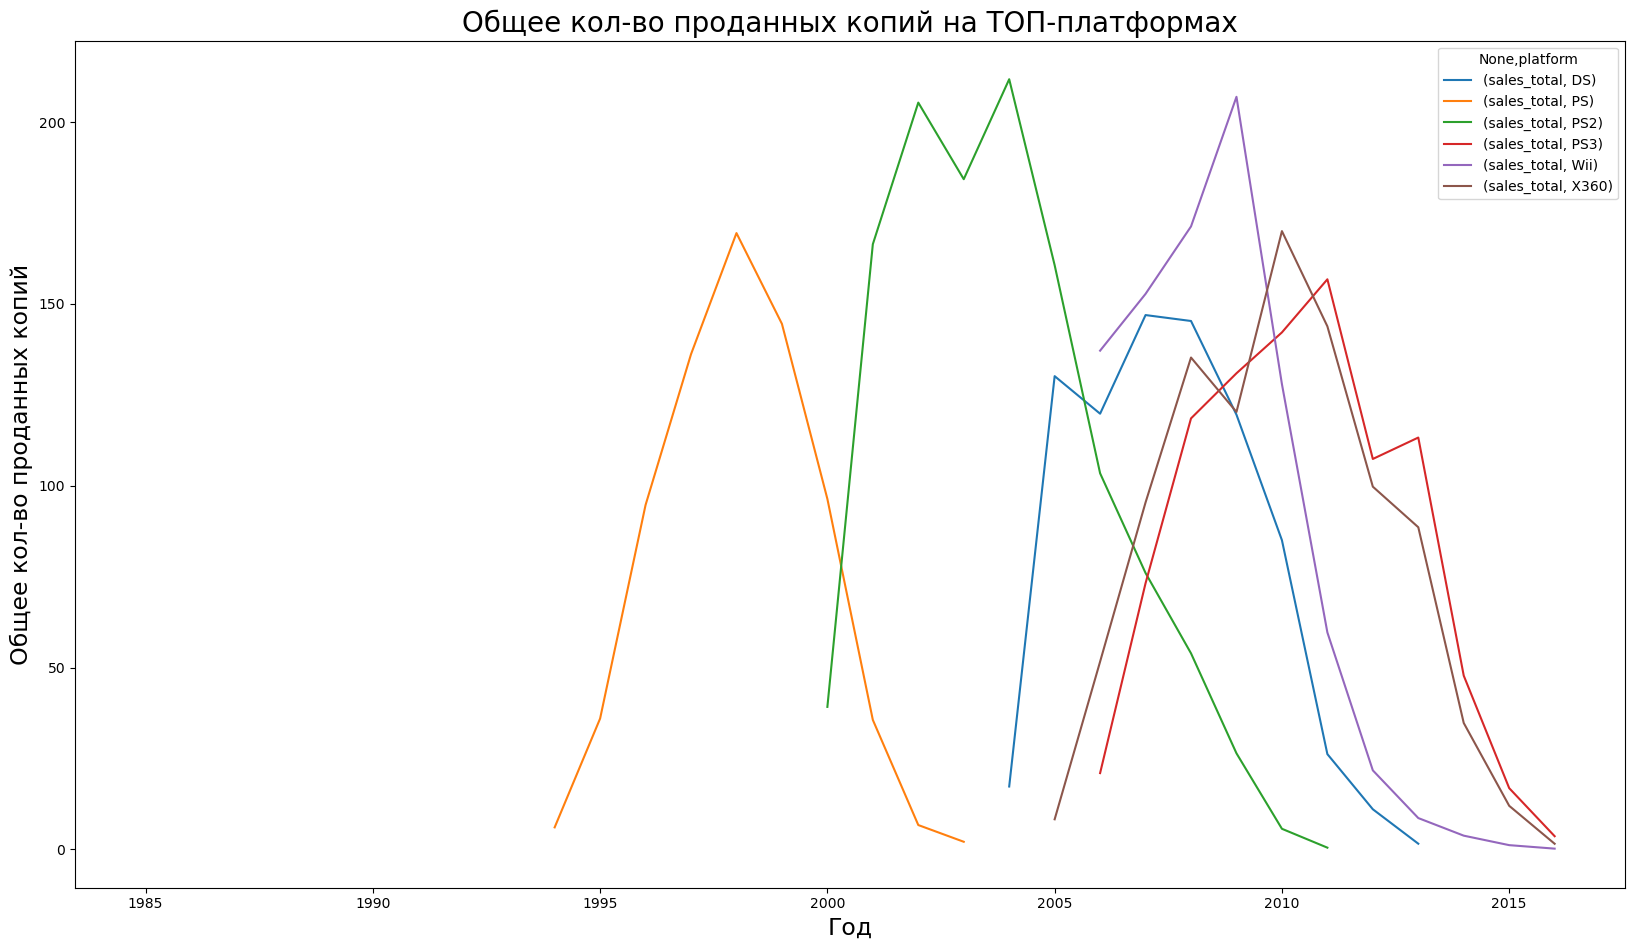

In [30]:
top.pivot_table(index=['year_of_release'], columns=['platform'], values=['sales_total'], aggfunc='sum').reset_index().\
        plot(x='year_of_release', figsize=(20,11))
plt.title('Общее кол-во проданных копий на ТОП-платформах', fontsize=20)
plt.xlabel('Год', fontsize=17)
plt.ylabel('Общее кол-во проданных копий', fontsize=17)
plt.show
# построим график, чтобы посмотреть на динамику продаж топовых платформ за все годы

Продажи на платформе X360 начались в 2005 году, достигли своего пика в 2010 году, в 2016 году продажи были на уровне ниже, чем в 2005 году.

Продажи на платформе Wii начались в 2006 году на весьма высоком уровне - около 125 млн проданных копий, достигли своего пика в 2009 году - больше 175 млн копий, продажи резко упали в 2011 году, дальше продолжили стремительно снижаться. 

Продажи на платформе DS начались в 2004 году - меньше 20 млн проданных копий, в следующем году был сильный рост - 120 млн проданнх копий, достигли своего пика в 2007 году - около 140 млн копий, продажи резко упали в 2011 году, дальше продолжили стремительно снижаться. После 2013 году продаж нет.

Продажи на платформе GBA начались в 2000 году - только одна игра, в следующем году был сильный рост - до 60 млн проданнх копий, достигли своего пика в 2004 году - чуть больше 70 млн копий, продажи резко упали в 2005 году. После 2007 года продаж нет.

Продажи на платформе PS2 начались в 2000 году, в 2001 года продажи увеличились в 4 раза, в этом же году был пик по продажам, после 2005 года продажи заметно падали с каждым годом. После 2011 года продаж нет.

Продажи на платформе PS3 начались в 2006 году, дальше продажи с каждым годом увеличивались, достигли своего пика в 2011 году - около 140 млн копий, после этого года продажи уже не достигали такого уровня. Продаж в 2016 году было меньше 10 млн копий.

На текущий момент можем отметить следующие тренды по выбранным платформам: 
1) версии PS постепенно заменяли друг друга, PS2 была самая успешная в плане продаж, но продажи сошли на нет в 2011 году, который оказался самый успешный для PS3.  
2) платформы, которые были запущены задолго до 2011 года и работали до 2011 года и позже, начали терять в продажах после 2011 года, за исключением X360. В свою очередь X360 и PS3 показали высокий уровень продаж в 2011 году.
3) для многих платформ наибольшие продажи были в период с 2007 года до 2010 года.

Жизненный цикл платформ в среднем 10 лет, за актуальный период возьмем 3 года - 2014-2016 гг: нам нужно сделать прогноз на 2017 год, рынок компьютерных игры быстро меняется, правильным будет взять последние несколько лет.

In [31]:
top_all = data.query('year_of_release >= 2014').pivot_table(index='platform',
                                 values='sales_total', 
                                 aggfunc='sum').sort_values(by='sales_total', 
                                                            ascending=False).reset_index().head(6)['platform']
top_actual = data.query('platform in @top_all and year_of_release >= 2014')
# сделаем срез по топовым платформам, начиная с 2014 года

<function matplotlib.pyplot.show(close=None, block=None)>

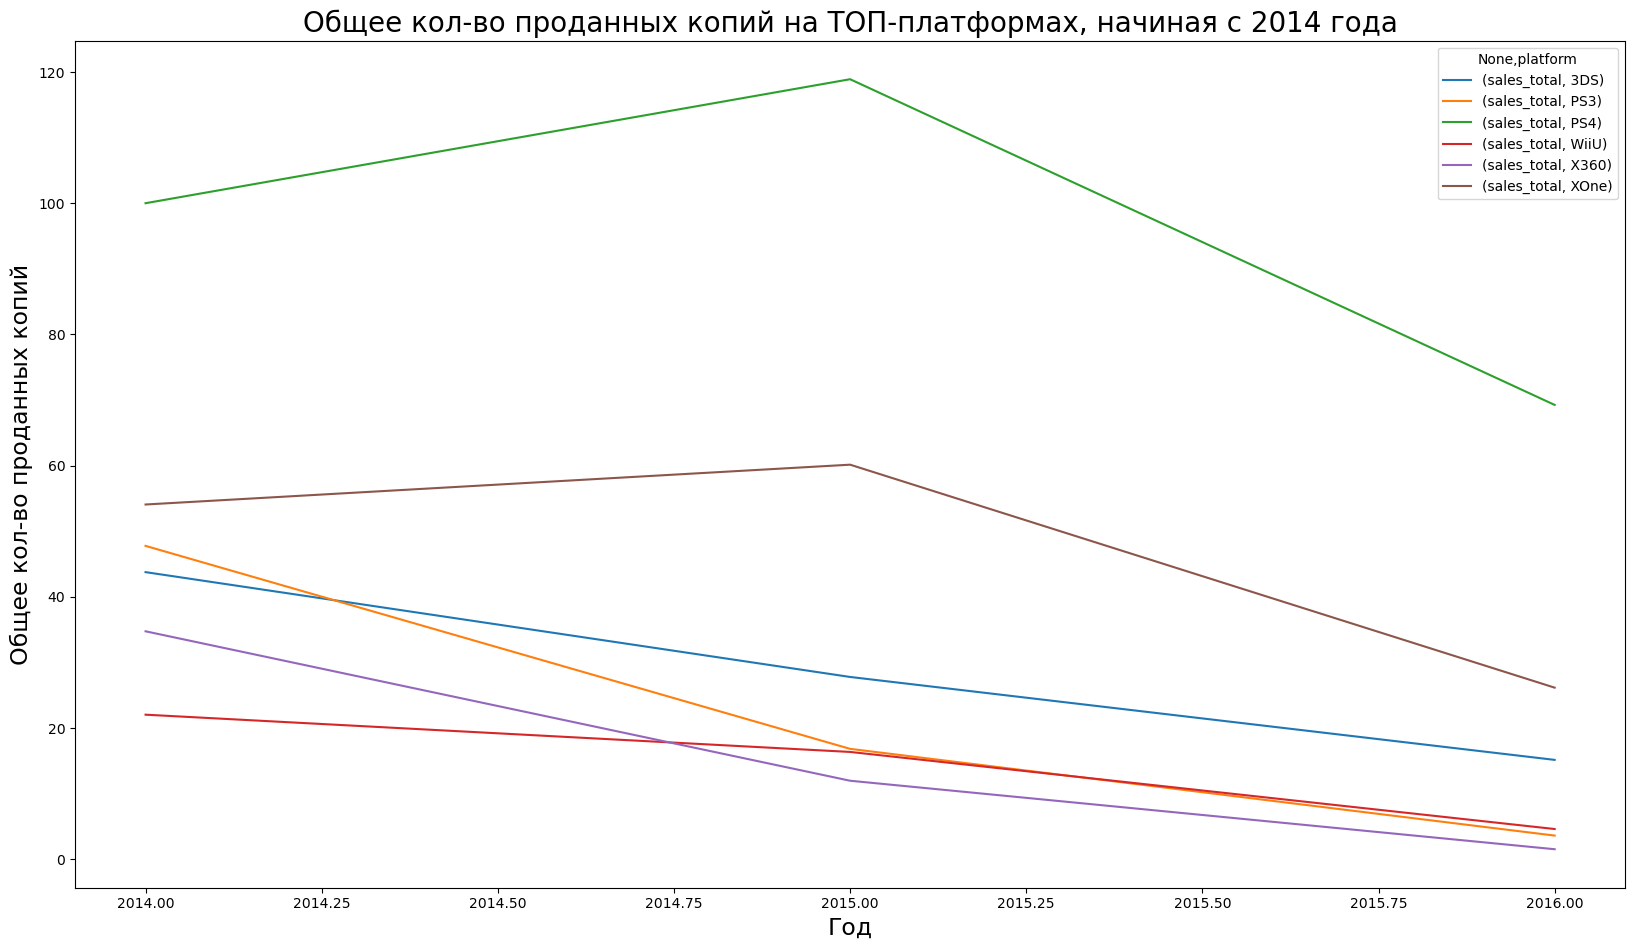

In [32]:
top_actual.pivot_table(index=['year_of_release'], columns=['platform'], values=['sales_total'], aggfunc='sum').reset_index().\
        plot(x='year_of_release', figsize=(20,11))
plt.title('Общее кол-во проданных копий на ТОП-платформах, начиная с 2014 года', fontsize=20)
plt.xlabel('Год', fontsize=17)
plt.ylabel('Общее кол-во проданных копий', fontsize=17)
plt.show
# построим график, чтобы посмотреть на динамику продаж на ТОП-платформах, начиная с 2014 года

 Топовые платформы, начиная с 2014 года, - PS4, XOne, 3DS, PS3, WiiU, X360.

(0.0, 4.0)

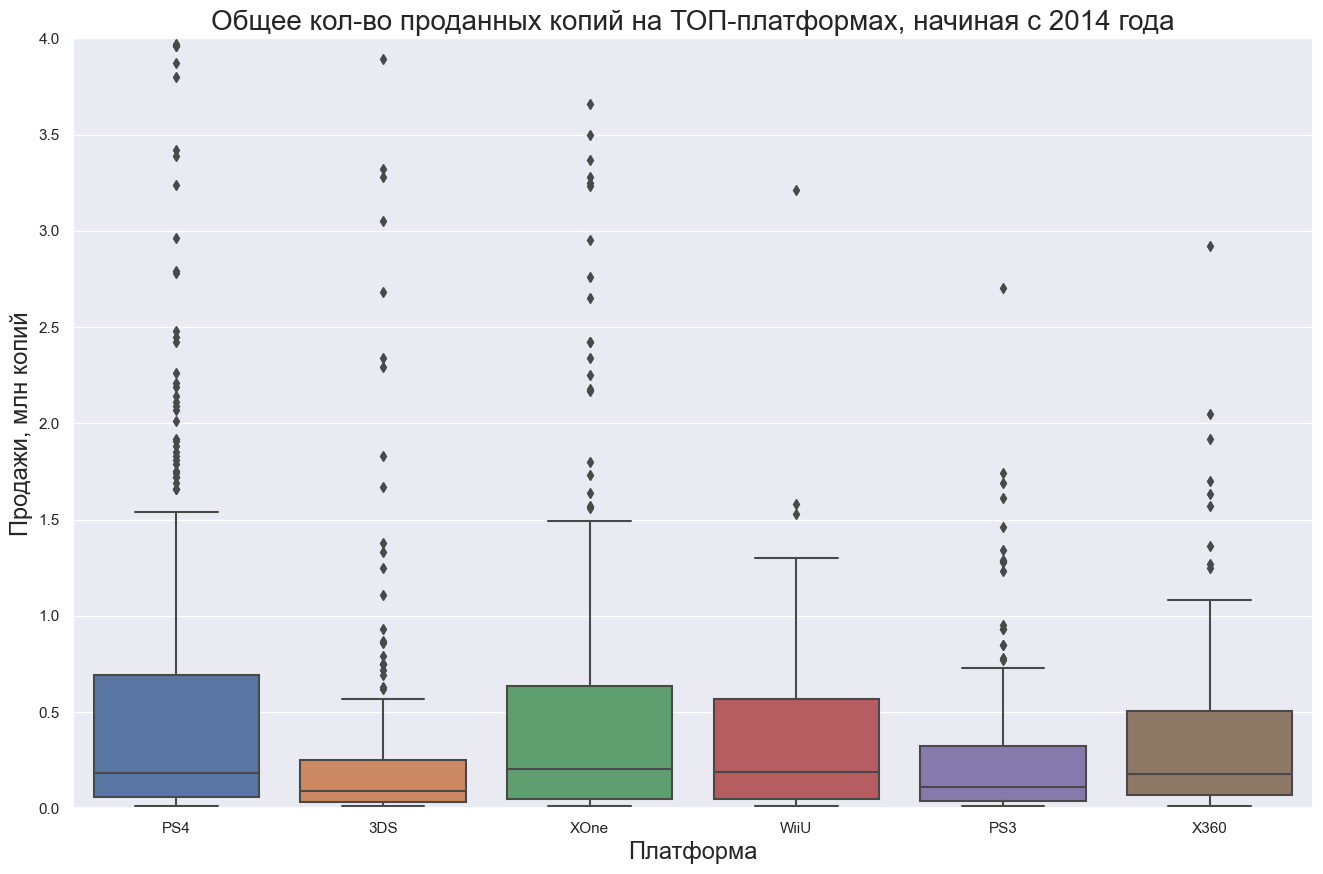

In [33]:
sns.set(rc={"figure.figsize":(16, 10)})
boxplot_platform = sns.boxplot(x='platform', y='sales_total', data=top_actual)
plt.title('Общее кол-во проданных копий на ТОП-платформах, начиная с 2014 года', fontsize=20)
plt.xlabel('Платформа', fontsize=17)
plt.ylabel('Продажи, млн копий', fontsize=17)
plt.ylim(0, 4)
# построим ящик с усами для топ платформ

На графике видим, что медиана для шести платформ находится примерно на одном уровне (PS4, XOne, WiiU, X360 лидируют).
Большее количество выбросов у PS4, чуть меньше у XOne, меньшее количество выбросов у WiiU. Можем сделать вывод, что на PS4 и XOne выпущено больше таких игр, которые отрываются от общего количества игр на платформе и продаются лучше остальных. Количество выбросов на 3DS тоже приличное, но 75% квартиль находится на самом низком уровне из всех. Все графики скошены вправо, говорит о том, что на каждой платформе есть выбросы, среднее значение выше медианы из-за экстремальных продаж по некоторым играм. Лучше всего выглядят PS4 и XOne: большее количество выбросов, верхняя граница ящика выше остальных, максимальные значения тоже больше, чем на других платформах.

### 3.3. Зависимость продаж от отзывов пользователей и критиков.

In [34]:
PS4_score = data.loc[((data['platform'] == 'PS4') & (data['year_of_release'].isin([2014, 2015, 2016])))]
# за популярную платформу возьмем PS4

Text(0, 0.5, 'Продажи, млн копий')

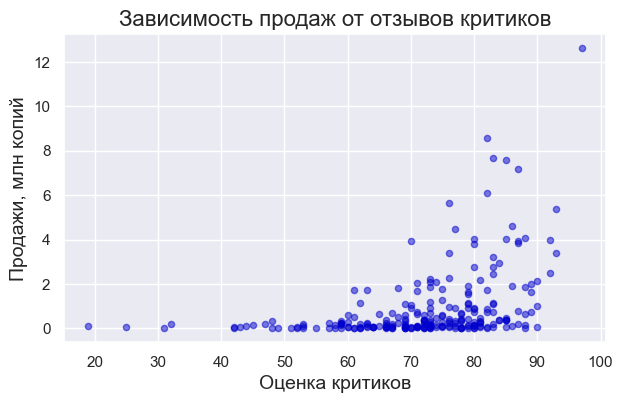

In [35]:
PS4_score.plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.5, figsize=(7,4), color='mediumblue')
plt.title('Зависимость продаж от отзывов критиков', fontsize=16)
plt.xlabel('Оценка критиков', fontsize=14)
plt.ylabel('Продажи, млн копий', fontsize=14)
# построим диаграмму рассеяния

In [36]:
PS4_score['critic_score'].corr(PS4_score['sales_total'])
# посчитаем коэф. корреляции

0.40266140969679737

Коэффициент корреляции слабый, судя по графику, оценка критиков начинает играть слабое значение, если оценка выше 70, ниже этой оценки, не наблюдается зависимость продаж от оценки. В целом не очень много игр, которые имеют рейтинг меньше 60.

Text(0, 0.5, 'Продажи, млн копий')

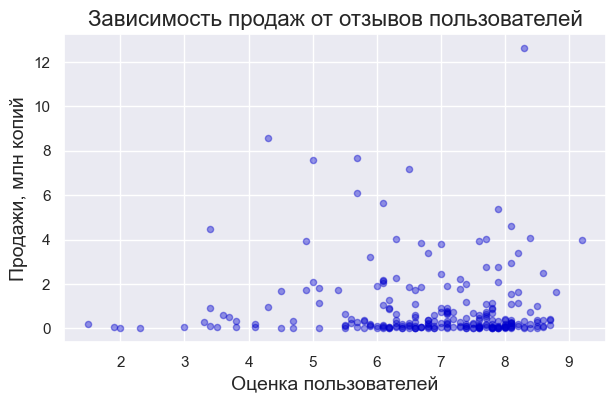

In [37]:
PS4_score.plot(x='user_score', y='sales_total', kind='scatter', alpha=0.4, figsize=(7,4), color='mediumblue')
plt.title('Зависимость продаж от отзывов пользователей', fontsize=16)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Продажи, млн копий', fontsize=14)

In [38]:
PS4_score['user_score'].corr(PS4_score['sales_total'])

-0.04013158656330139

И коэффициент корреляции, и график говорят о том, что нет линейной зависимости между продажами от оценками пользователей. 

Посмотрим, есть ли более выраженная зависимость на других платформах.

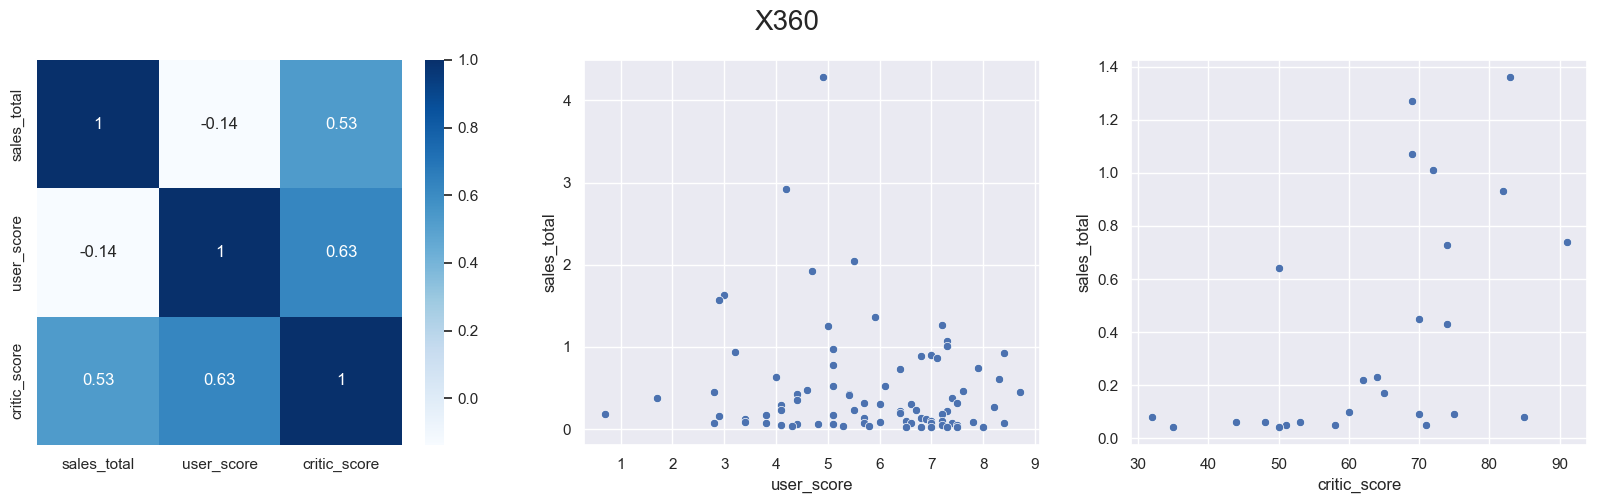

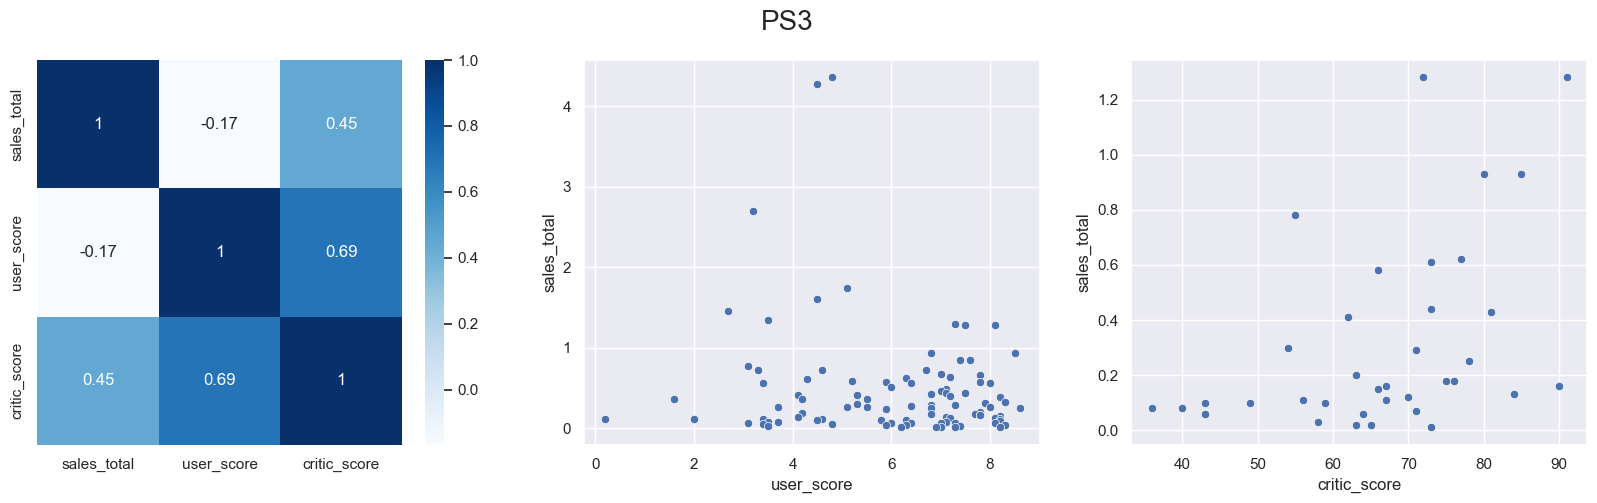

In [39]:
def scatter(data, platform_name):
    platform = data.loc[data['platform'] == platform_name]
    platform = platform[['sales_total', 'user_score', 'critic_score']]
    
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    plt.suptitle(platform_name, fontsize=20)
  
    sns.heatmap(ax=ax[0], data=platform.corr(), xticklabels=platform.corr().columns, yticklabels=platform.corr().columns, 
               cmap='Blues', annot=True)
  
    sns.scatterplot(ax=ax[1], x='user_score', y='sales_total', data=platform)
    sns.scatterplot(ax=ax[2], x='critic_score', y='sales_total', data=platform)
    plt.show()
    
platforms = ['X360', 'PS3']
for platform in platforms: 
    scatter(top_actual, platform)
    
# создадим функцию, чтобы построить графики по 2 другим платформам и рассчитать коэф. корреляции

На платформах PS3 и X360 тоже не наблюдается сильная линейная зависимость между оценками критиков и продажами, хотя коэффициент корреляции для обеих платформ выше. Что касается зависимости между оценками пользователей и продажами, то на графике видно, что значения расположены хаотично, продажи не увеличиваются и не уменьшаются с ростом оценки, коэффициенты корреляции также очень слабые. 

### 3.4. Общее распределение игр по жанрам. 

In [40]:
data.query('year_of_release >= 2014').groupby('genre')['sales_total'].agg(['median','count', 'sum']).sort_values(by='median',
                                                                                                          ascending=False)
# сделаем срез по жанром в актуальном периоде, сравнивать будем медианные продажи 

,median,count,sum
genre,,,
Shooter,0.515,128,170.940002
Sports,0.180,161,109.480003
Platform,0.140,38,18.090000
Fighting,0.125,60,28.219999
Role-Playing,0.110,221,101.440002
Simulation,0.100,44,13.130000
Misc,0.090,113,37.549999
Action,0.090,619,199.360001
Racing,0.090,69,27.520000


Медианные продажи в актуальном периоде больше в следующих жанрах: Shooter, Sports, Platform, Role-Playing. Топ-2 жанра - Shooter, Sports. Наименьшие медианы по продажам у Strategy, Puzzle, Adventure.
Игр с жанром Action - 619 (макс. значение). Меньшее количество у жанров: Puzzle - 14, Strategy - 37, Platform - 38.
Несмотря на то, что суммарные продажи выше всего в жанре Action, медианные продажи лучше у жанра Shooter, это значит, что игры с жанром Shooter в целом приносят более высокий доход, в то время как в жанре Action можем быть очень много игр с низкими продажами.

In [41]:
data.query('year_of_release >= 2014').groupby('genre')['jp_sales'].agg(['median','count', 'sum']).sort_values(by='median',
                                                                                                          ascending=False)
# сделаем срез по жанром в актуальном периоде, сравнивать будем медианные продажи в Японии

,median,count,sum
genre,,,
Role-Playing,0.05,221,31.16
Fighting,0.03,60,6.37
Puzzle,0.03,14,0.93
Action,0.01,619,29.58
Adventure,0.01,185,3.60
Misc,0.01,113,5.61
Platform,0.00,38,2.69
Racing,0.00,69,1.76
Shooter,0.00,128,4.87


Стабильно высокий доход приносят игры в жанре Role-Playing, они лидируют и по медианным и по общим продажам.

In [42]:
data.loc[(data['genre'].isin(['Shooter', 'Sports', 'Platform'])) & (data['year_of_release'] >= 2014)].\
sort_values(by='sales_total', ascending=False).head(15)
# сделаем срез по самым прибыльным жанрам в актуальном периоде

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26


В топ-15 входят игры преимущественно с жанром - Shooter, игр с жанром Sports - всего 3. Игра Call of Duty: Afvanced Warfare попала в топ-15 4 раза, значит, что на всех платформах хорошо продавалась.

## 4. Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

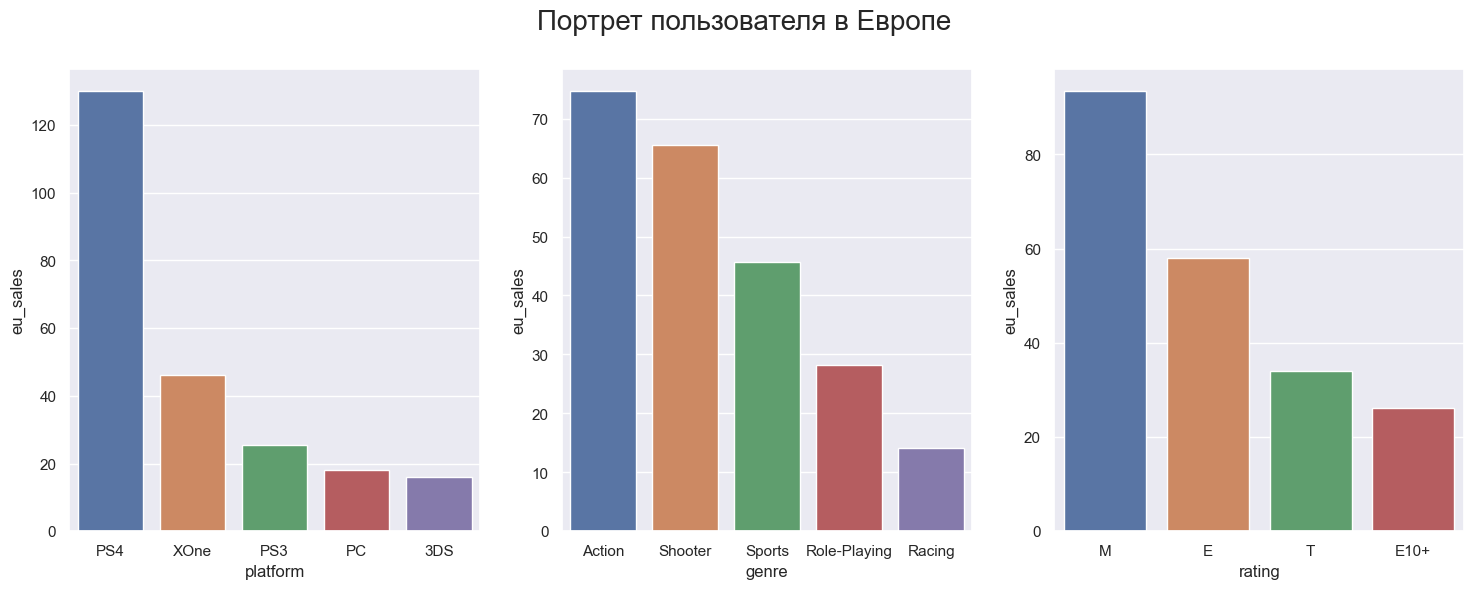

In [43]:
def user_portrait(row, data, title):
    fig, axes = plt.subplots(1, 3, figsize=(18,6))
    fig.suptitle(title, fontsize=20)

    for user, ax in zip(['platform', 'genre', 'rating'], axes):
        user_data = data.pivot_table(index=user, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().head(5)
        sns.barplot(data=user_data, x=user, y=row, ax=ax)
        
    plt.show()

user_portrait(row='eu_sales', data=data.query('year_of_release >= 2014'), title='Портрет пользователя в Европе')
# создадим функцию, чтоб посмотреть на топ-5 платформ, жанров и рейтингов в каждом регионе в актуальном периоде

С большим отрывом в Европе лидирует PS4, следующая по продажам - XOne, объем продаж почти в 3 раза меньше. Остальные 3 платформы занимают только 25% от общего объёма продаж среди ТОП-5 платформ. 
Среди жанров самые популярные - Action и Shooter.
Игры с Рейтином 'M' - Mature, приносят больше всего продаж, 'E10+' - для всех 10 лет и старше - меньше всего продаж.

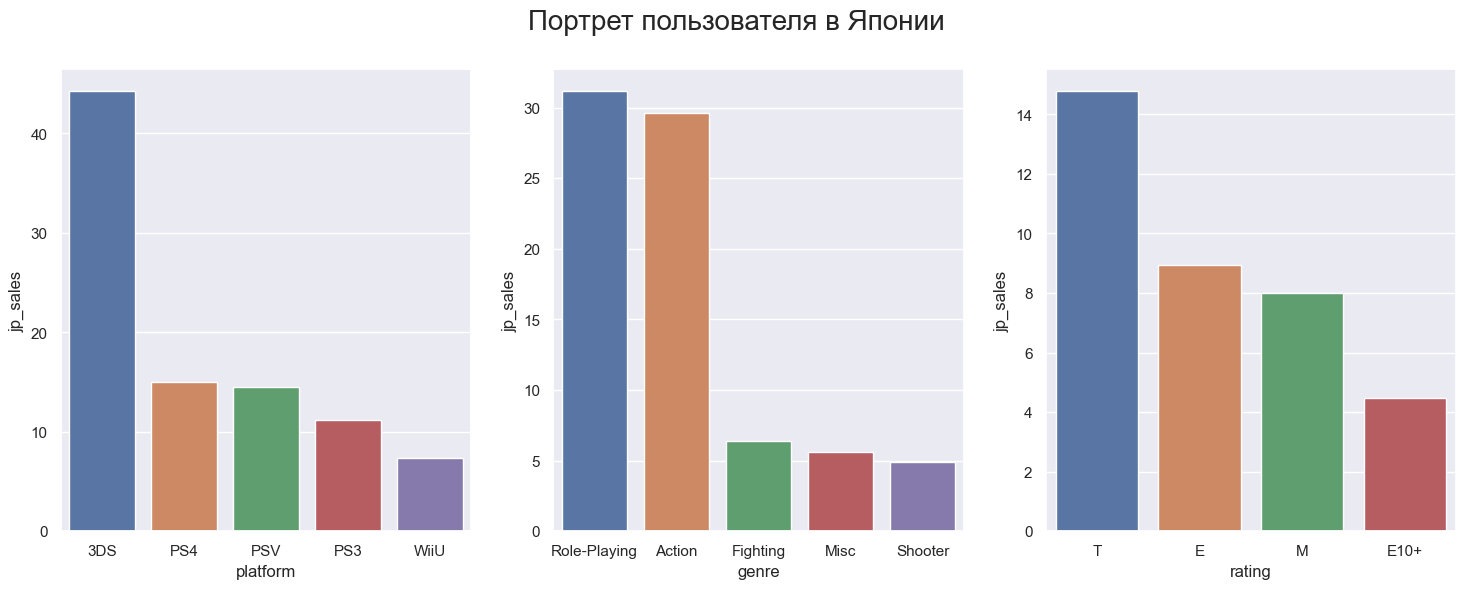

In [44]:
user_portrait(row='jp_sales', data=data.query('year_of_release >= 2014'), title='Портрет пользователя в Японии')

В Японии лидер - 3DS, следующая по продажам - PS4, объем продаж почти в 3 раза меньше. Остальные 3 платформы только 35% от общего объёма продаж среди ТОП-5 платформ. 
Среди жанров самые популярные - Action и Role-Playing. Fighting, Misc, Shooter приносят около 20% всех продаж.
По сравнению с Европой, жанр Shooter совсем непопулярный.
Игры с Рейтином 'T' - Teen, приносят больше всего продаж, 'E10+' - для всех 10 лет и старше - также меньше всего продаж.
Видимо в Японии более популярны игры для подростков. Игры для взрослых только на 3 месте по продажам. 

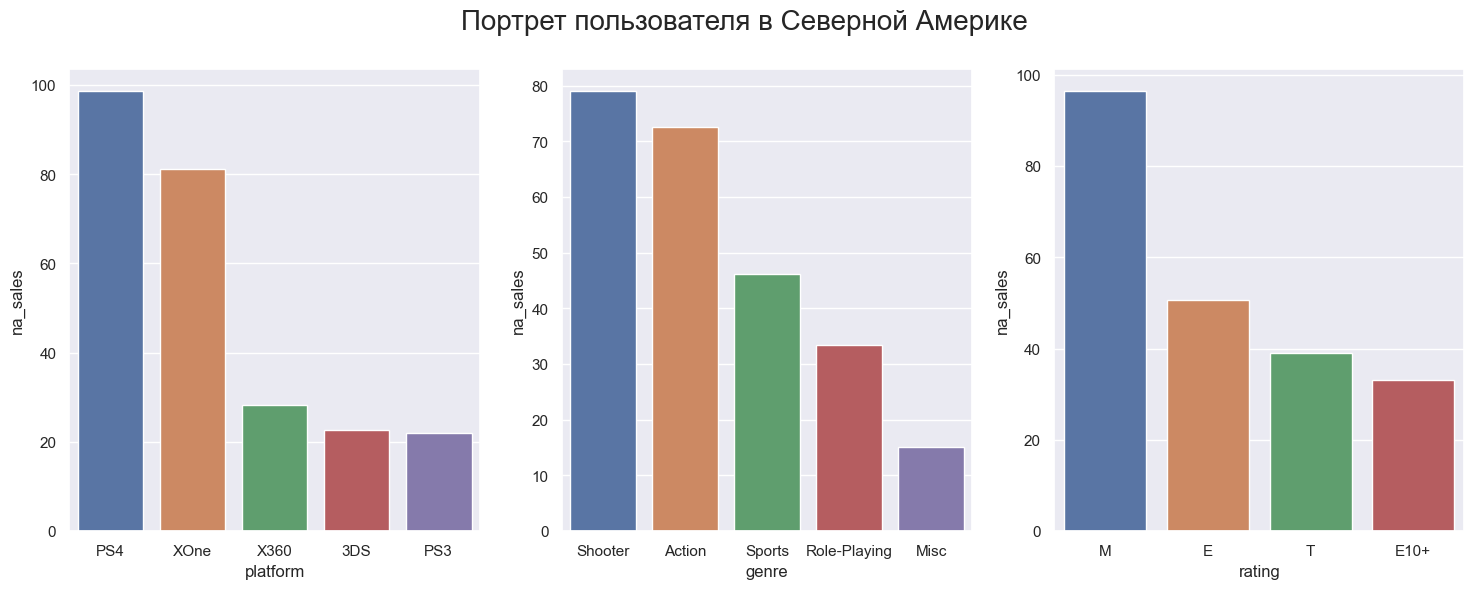

In [45]:
user_portrait(row='na_sales', data=data.query('year_of_release >= 2014'), title='Портрет пользователя в Северной Америке')

В СА лидер как и в Европе - PS4, следующая по продажам также - XOne. Остальные 3 платформы - X360, 3DS, PS3 - только 27% от общего объёма продаж среди ТОП-5 платформ. 
Среди жанров самые популярные - Shooter и Action. Role-Playing и Misc - наименее популярные.
Игры с Рейтингом 'M' - Mature приносят больше всего продаж, 'E10+' - для всех 10 лет и старше - также меньше всего продаж.
Портрет пользователя в Европе и Северной Америке во много схож. В Японии заметны другие тенденции. 

## 5. Проверка гипотез 

H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = 
    Средний пользовательский рейтинг (user_score) платформы PC
    
H_a: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ 
    Средний пользовательский рейтинг (user_score) платформы PC`
    
alpha = 0.05

In [46]:
from scipy import stats as st

samp1 = data[(data['platform'] == 'XOne') & (data['user_score'] > 0) & (data['year_of_release'] >= 2014)]['user_score']
samp2 = data[(data['platform'] == 'PC') & (data['user_score'] > 0) & (data['year_of_release'] >= 2014)]['user_score']
results = st.ttest_ind(samp1, samp2, equal_var=False) # results = вызов метода для проверки гипотезы

alpha = .05 

sign = results.pvalue # выводим значения p-value  
sign

0.11601545900050317

In [47]:
if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')  

Не получилось отвергнуть нулевую гипотезу


Тестировали гипотезу о равенстве средних пользовательских рейтингах на платформах Xbox One и PC. За нулевую гипотезу возьмем, что средние рейтинги равны. За альтернативную - средние рейтинги не равны. Проверяем двустороннюю гипотезу с помощью t-test. Критический уровень статистической значимости возьмем за 0.05. Полученное p-value сравним с этим уровнем. 
Данныx недостаточное — для выбранного уровня значимости — чтобы отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средние рейтини равны для двух платформ.

H_0: Средний пользовательский рейтинг (user_score) жанра "Action" =
    Средний пользовательский рейтинг (user_score) жанра "Sports"
    
H_a: Средний пользовательский рейтинг (user_score) жанра "Action" ≠ 
    Средний пользовательский рейтинг (user_score) жанра "Sports"`
    
alpha = 0.05

In [48]:
samp1 = data[(data['genre'] == 'Action') & (data['user_score'] > 0) & (data['year_of_release'] >= 2014)]['user_score']
samp2 = data[(data['genre'] == 'Sports') & (data['user_score'] > 0) & (data['year_of_release'] >= 2014)]['user_score']
results = st.ttest_ind(samp1, samp2, equal_var=False) # results = вызов метода для проверки гипотезы

alpha = .05 

sign = results.pvalue # вывод значения p-value на экран 
sign

1.1825638224397033e-14

In [49]:
if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')  

Отвергаем нулевую гипотезу


Данных достаточно, чтобы отвергнуть нулевую гипотезу. Делаем вывод, что средние пользовательские рейтинги для обоих жанров не равны.  

## 6. Общий вывод

В этои исследовании мы анализировали интернет-магазин, работали c историческими данными о продажах игр в Европе, Японии, Северной Америке и других странах, оценок пользователей и экспертов, жанров, платформ. Цель исследования - выявить определяющие успешность игры закономерности, чтобы в итоге определить потенциально популярный продукт и спланировать рекламные кампании.
В первую очередь изучили данные, далее обработали:1) изучили пропуски в значениях, часть строк с пропущенными значениями мы удалили, так чтобы это не повлияло на общий ход и результаты исследования, 2) проанализировали наличие дубликатов, 3) изменили тип данных в некоторых столбцах.
Далее добавили новый столбец на основе имеющихся данных о продажах в разных странах, который пригодился в процессе исследовательского анализа данных. 
В процессе исследовательского анализа определили топовые платформы, которые приносили больше всего продаж, посмотрели на их динамику на протяжении жизни платформы.
Далее мы выяснили, что оценки пользователей и критиков не оказывают сильное влияние на то, как продаются игры на платформах.
В конце посмотрели на портрет пользователя в СА, Европе и Японии. Сделали вывод, что пользователи в Европе и СА во многом покупают и играют те же игры на одинаковых платформах, в Японии пользователи ведут себя иначе. 
Также протестировали две гипотезы относительно платформ и жанров. 

В итоге можем сказать, что следующие платформы показали наилучшие результаты: PS4, XOne (в СА и Европе), 3DS (для пользователей в Японии). При прогнозе продаж можно обратиться к оценкам критиков, в то время как оценки пользователей не оказывают влияние на продажи. Игры в жанрах Shooter и Sports стабильно приносят высокий доход, однако у жанра Sports медианная продажа меньше в 3 раза. Надо отметить, что жанр Shooter менее популярный среди пользователей в Японии, наиболее высокие стабильные продажи в жанре Role-Playing. Рекомендуем планировать рекламные кампании в соответствии с выводами выше. 